In [1]:
## you can use this cell if you run on colab and ypu want download
## dataset from kaggle

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission
!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip

kaggle.json
 94% 57.0M/60.3M [00:00<00:00, 45.7MB/s]
100% 60.3M/60.3M [00:00<00:00, 112MB/s] 


In [1]:
import numpy as np
from numpy import asarray
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from sklearn import preprocessing
import cv2
import matplotlib.pyplot as plt
from os import listdir
from PIL import Image

#Loading Dataset

In [2]:
train_directory = '/content/train/'
test_directory = '/content/test/'

num_classes = 7

X_train = []
y_train = []
# enumerate files
for filename in listdir(train_directory):
  # path
  path = train_directory + filename + '/'

  for imagename in listdir(path):
    
    image_path=path+imagename

    image = Image.open(image_path)
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)

    X_train.append(pixels)

    y_train.append(filename)

X_train = asarray(X_train)
y_train = asarray(y_train)

In [3]:
X_test = []
y_test = []
# enumerate files
for filename in listdir(test_directory):
  # path
  path = test_directory + filename + '/'

  for imagename in listdir(path):
    
    image_path=path+imagename

    image = Image.open(image_path)
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)

    X_test.append(pixels)

    y_test.append(filename)

X_test = asarray(X_test)
y_test = asarray(y_test)

Text(0.5, 0, 'neutral')

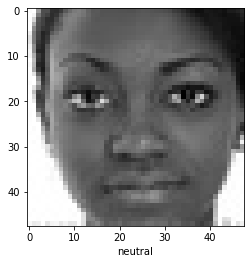

In [4]:
plt.imshow(X_train[5])
plt.xlabel(y_train[5])

Text(0.5, 0, 'neutral')

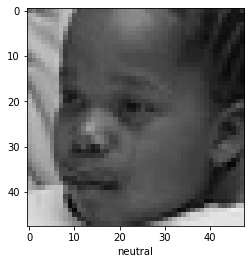

In [5]:
plt.imshow(X_test[5])
plt.xlabel(y_test[5])

In [6]:
X_train.shape

(28709, 48, 48, 3)

In [7]:
X_test.shape

(7178, 48, 48, 3)

## Preprocessing Dataset

In [8]:
le = preprocessing.LabelEncoder()

In [9]:
y_train_encode = le.fit_transform(y_train)
y_train_binarizer = keras.utils.to_categorical(y_train_encode,num_classes=num_classes)

In [10]:
print(y_train_encode)
print(y_train_binarizer)
print(y_train)
print(np.argmax(y_train_binarizer,axis=1))
print(le.inverse_transform(np.argmax(y_train_binarizer,axis=1)))

[4 4 4 ... 3 3 3]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['neutral' 'neutral' 'neutral' ... 'happy' 'happy' 'happy']
[4 4 4 ... 3 3 3]
['neutral' 'neutral' 'neutral' ... 'happy' 'happy' 'happy']


In [11]:
y_test_encode = le.transform(y_test)
y_test_binarizer = keras.utils.to_categorical(y_test_encode,num_classes=num_classes)

In [12]:
indx = np.arange(len(X_train))
np.random.shuffle(indx)

X_train = X_train[indx]
y_train_binarizer = y_train_binarizer[indx]

In [13]:
X_train = X_train.astype('float')

# mean , std = X_train.mean() , X_train.std()

# X_train = (X_train - mean) / std

X_train = X_train/127.5 - 1

X_test = X_test.astype('float')

# mean , std = X_test.mean() , X_test.std()

# X_test = (X_test - mean) / std

X_test = X_test/127.5 - 1

# Build CNN model

In [14]:
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
model = keras.models.Sequential([
                                 Input(shape = input_shape),
                                 Conv2D(16,kernel_size=(3,3),
                                        # kernel_regularizer='l2',
                                        kernel_initializer='he_normal'),
                                #  BatchNormalization(),
                                 Activation('relu'),
                                 Conv2D(32,kernel_size=(3,3),
                                        # kernel_regularizer='l2',
                                        kernel_initializer='he_normal'),
                                 BatchNormalization(),
                                 Activation('relu'),
                                 MaxPooling2D(pool_size=(2,2)),
                                 Conv2D(64,kernel_size=(3,3),
                                        # kernel_regularizer='l2',
                                        kernel_initializer='he_normal'),
                                #  BatchNormalization(),
                                 Activation('relu'),
                                 Conv2D(64,kernel_size=(3,3),
                                        # kernel_regularizer='l2',
                                        kernel_initializer='he_normal'),
                                #  BatchNormalization(),
                                 Activation('relu'),
                                 MaxPooling2D(pool_size=(2,2)),
                                 Conv2D(128,kernel_size=(3,3),
                                        # kernel_regularizer='l2',
                                        kernel_initializer='he_normal'),
                                #  BatchNormalization(),
                                 Activation('relu'),
                                 Conv2D(128,kernel_size=(3,3),
                                        # kernel_regularizer='l2',
                                        kernel_initializer='he_normal'),
                                #  BatchNormalization(),
                                 Activation('relu'),
                                 AveragePooling2D(),
                                 Flatten(),
                                 Dense(1024,kernel_initializer='he_normal'),
                                 Activation('relu'),
                                 Dropout(0.5),
                                 Dense(num_classes,activation='softmax')
])

In [15]:
learning_rate = 0.001
learning_rates = keras.optimizers.schedules.PiecewiseConstantDecay([5000,7500,10000],
                                                                   [learning_rate,learning_rate/0.1,learning_rate/0.01,learning_rate/0.001])
optimizer = keras.optimizers.Adam(learning_rate=learning_rate,decay=1e-6)
model.compile(optimizer=optimizer,loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 44, 44, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        1

In [17]:
datagen = keras.preprocessing.image.ImageDataGenerator(
          featurewise_center=False, samplewise_center=False,
          featurewise_std_normalization=False, samplewise_std_normalization=False,
          zca_whitening=False, zca_epsilon=1e-06, rotation_range=10.0, width_shift_range=0.125,
          height_shift_range=0.125, brightness_range=None, shear_range=0.0, zoom_range=0.0,
          channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
          horizontal_flip=True, vertical_flip=False, rescale=None,
          preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None

      )

datagen.fit(X_train)

In [18]:
model.fit(datagen.flow(X_train,y=y_train_binarizer,batch_size=128),
          epochs = 60 , validation_data=(X_test,y_test_binarizer),
          workers = 4)

Epoch 1/60
225/225 [==============================] - 26s 102ms/step - loss: 1.8370 - accuracy: 0.2476 - val_loss: 1.6698 - val_accuracy: 0.3324
Epoch 2/60
225/225 [==============================] - 23s 101ms/step - loss: 1.6419 - accuracy: 0.3466 - val_loss: 1.4619 - val_accuracy: 0.4401
Epoch 3/60
225/225 [==============================] - 23s 100ms/step - loss: 1.4916 - accuracy: 0.4217 - val_loss: 1.3510 - val_accuracy: 0.4854
Epoch 4/60
225/225 [==============================] - 23s 100ms/step - loss: 1.3899 - accuracy: 0.4735 - val_loss: 1.2417 - val_accuracy: 0.5294
Epoch 5/60
225/225 [==============================] - 23s 100ms/step - loss: 1.3173 - accuracy: 0.4914 - val_loss: 1.2688 - val_accuracy: 0.5125
Epoch 6/60
225/225 [==============================] - 23s 101ms/step - loss: 1.2602 - accuracy: 0.5200 - val_loss: 1.1886 - val_accuracy: 0.5397
Epoch 7/60
225/225 [==============================] - 23s 100ms/step - loss: 1.2200 - accuracy: 0.5398 - val_loss: 1.1450 - val_ac

In [29]:
result = model.evaluate(x=X_test,y=y_test_binarizer)
print(f'test accuracy = {result[1]*100}')

225/225 [==============================] - 1s 4ms/step - loss: 1.0567 - accuracy: 0.6349
test accuracy = 63.48565220832825
